## 4_5.推計統計学

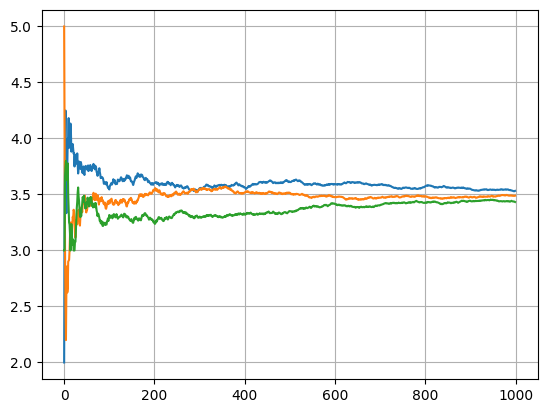

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 試行回数
steps = 1000
# サイコロ
dice = np.array([1, 2, 3, 4, 5, 6])
# 試行回数を1から始まる等差数列にする
count = np.arange(1, steps + 1)
# 標本平均の平均を求める処理を３回実施
for i in range(3):
  # diceからランダムに１つ取り出し，これを１回の試行で得られる平均値とする
  # これをstepsだけ繰り返し，その累積和を求める
  sample_mean_cum = np.random.choice(dice, steps).cumsum()
  # 標本平均の平均を求める
  # 試行１回ごとの平均値を試行回数でわって各試行ごとに平均値を求めることでシミュレーションする
  plt.plot(sample_mean_cum / count)
  plt.grid(True)

In [ ]:
# 中心極限定理
import numpy as np
import matplotlib.pyplot as plt

def central_theory(num):
  # サイコロ
  dice = np.array([1, 2, 3, 4, 5, 6])
  # 1から6までの等差数列を作成
  count = np.arange(1, num + 1, dtype=float)
  # 試行回数を何セット繰り返すか
  steps = 1000
  # num回の試行から得られた平均値をstepsの数だけ格納する配列
  mean = np.array([])

  # 標本平均の平均を求める処理をnum回実施する処理をsteps回繰り返す
  for i in range(steps):
    # diceからランダムに１つを取り出すことをnum回繰り返し，抽出されたサイコロの目の累積和を求める
    sample_mean_cum = np.random.choice(dice, num).cumsum()
    # num回の試行で得られたサイコロの目の累積和を試行回数numで割って平均値を求め，配列meanに格納する
    mean = np.append(mean, sample_mean_cum[num - 1] / num)

  # 標本平均の平均をヒストグラムにする
  plt.hist(mean)
  plt.grid(True)
  plt.show()


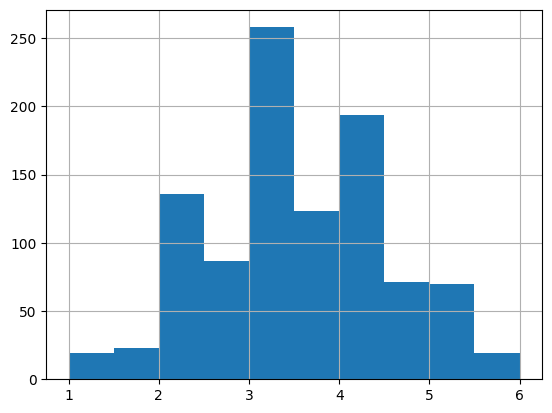

In [ ]:
# 試行回数のベースを３にして実行
central_theory(3)

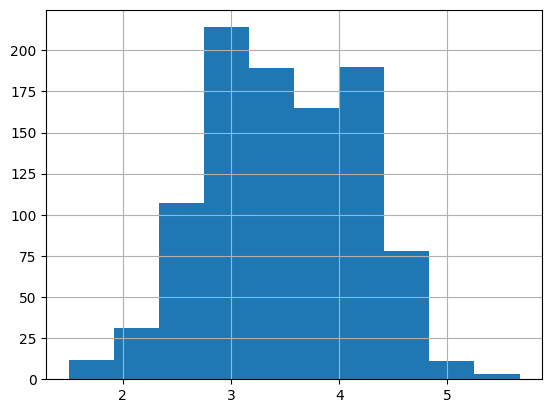

In [ ]:
# 試行回数のベースを6にして実行
central_theory(6)

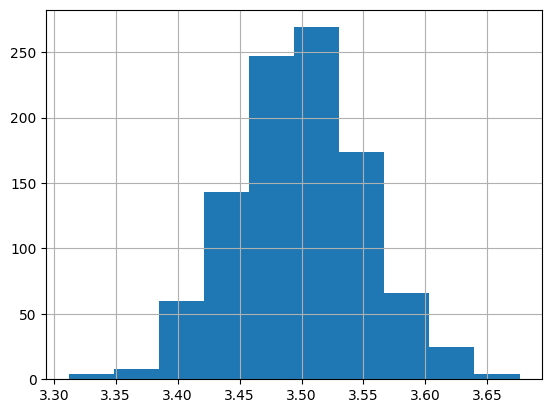

In [ ]:
# 試行回数のベースを1000にして実行
central_theory(1000)

In [2]:
import pandas as pd
import numpy as np

# CSVファイルのデータをデータフレームに読み込む
df = pd.read_csv('measurement.csv')
# 標本平均を格納する配列
sample_mean = np.array([])
# 処理を１５回繰り返す
for i in range(15):
  # サンプルサイズを５にしてランダムサンプリングを行う
  # デフォルトのreplace=Falseで，復元抽出を行わないようにする
  sample = df.sample(5)
  # 標本平均を求めてsample_meanに追加
  sample_mean = np.append(sample_mean, sample.mean())

# 標本平均の平均
print('標本平均の平均:', sample_mean.mean())
# 標本平均の分散
print('標本平均の分散:', sample_mean.var())
# 母集団の平均
print('母集団の平均:', df['capacity'].mean())
# 母集団の分散
print('母集団の分散:', df['capacity'].var(ddof=0))

標本平均の平均: 181.10666666666668
標本平均の分散: 46.079288888888904
母集団の平均: 181.36
母集団の分散: 131.9904


In [4]:
import pandas as pd
import numpy as np

# CSVファイルのデータをデータフレームに読み込む
df = pd.read_csv('measurement.csv')
# 標本平均を格納する配列
sample_mean = np.array([])
# 標本平均の分散を格納する配列
sample_svar = np.array([])
# 標本平均の不偏分散を格納する配列
sample_uvar = np.array([])

# 処理を１５回繰り返す
for i in range(15):
  # サンプルサイズを20にしてランダムサンプリングを行う
  # デフォルトのreplace=Falseで，復元抽出を行わないようにする
  # random_state=0を設定して乱数を固定
  sample = df.sample(20, random_state=0)
  # 標本平均を求めてsample_meanに追加
  sample_mean = np.append(sample_mean, sample.mean())
  # 標本平均の分散を求めてsample_svarに追加
  sample_svar = np.append(sample_svar, sample.var(ddof=0))
  # 標本平均を求めてsample_uvarに追加
  sample_uvar = np.append(sample_uvar, sample.var(ddof=1))

# 標本分散の平均
print('標本分散の平均:', sample_svar.mean())
# 標本の不偏分散平均
print('標本の不偏分散の平均:', sample_uvar.mean())
# 母集団の分散
print('母集団の分散:', df['capacity'].var(ddof=0))

標本分散の平均: 122.82750000000006
標本の不偏分散の平均: 129.29210526315794
母集団の分散: 131.9904
